# ML 101

## Evaluation (AutoML)

Automated Machine Learning (AutoML) refers to techniques for automatically discovering well-performing models for predictive modeling tasks with very little user involvement.

[Auto-Sklearn](https://github.com/automl/auto-sklearn) is an open-source library for performing AutoML in Python. It makes use of the popular [Scikit-Learn](https://scikit-learn.org/stable/) machine learning library for data transforms and machine learning algorithms and uses a Bayesian Optimization search procedure to efficiently discover a top-performing model pipeline for a given dataset.


In [ ]:
!pip install auto-sklearn==0.14.1

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
def plot_decision_boundary(X, y, clf):
  x_min, x_max = X[:, 0].min() - 2, X[:, 0].max() + 2
  y_min, y_max = X[:, 1].min() - 2, X[:, 1].max() + 2

  xx, yy = np.mgrid[x_min:x_max:.01, y_min:y_max:.01]
  grid = np.c_[xx.ravel(), yy.ravel()]
  probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

  f, ax = plt.subplots(figsize=(8, 6))
  contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)

  ax_c = f.colorbar(contour)
  ax_c.set_label("$P(y = 1)$")
  ax_c.set_ticks([0, .25, .5, .75, 1])

  ax.scatter(X[:,0], X[:, 1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
  ax.set(aspect="equal", xlim=(x_min, x_max), ylim=(y_min, x_max), xlabel="$X_1$", ylabel="$X_2$")
  plt.show()

## Hard Toy Dataset

In [4]:
# import dataset
df = pd.read_csv('https://media.githubusercontent.com/media/mariolpantunes/ml101/main/datasets/toy_dataset_02.csv')
# print the first rows of the dataset
df.head()

,X1,X2,Y
0,0,0,0
1,0,1,0
2,0,2,0
3,0,3,1
4,0,4,0


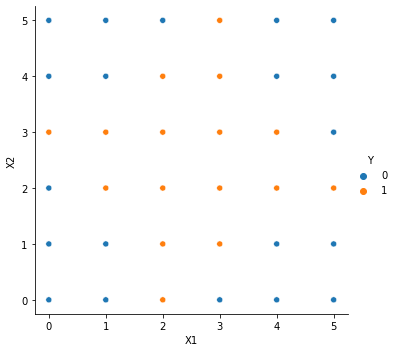

In [5]:
sns.relplot(x="X1", y="X2", hue="Y", data=df);

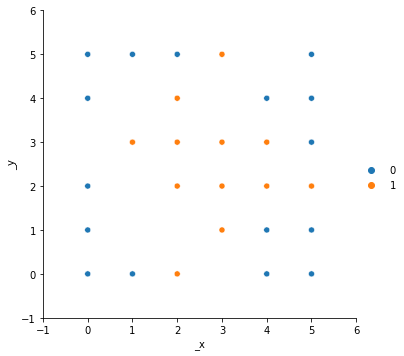

In [9]:
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

X = df[['X1', 'X2']].to_numpy()
y = df['Y'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
g = sns.relplot(x=X_train[:,0], y=X_train[:,1], hue=y_train)
g.set(ylim=(-1, 6))
g.set(xlim=(-1, 6))

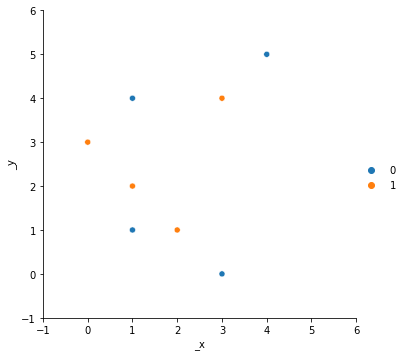

In [7]:
g = sns.relplot(x=X_test[:,0], y=X_test[:,1], hue=y_test)
g.set(ylim=(-1, 6))
g.set(xlim=(-1, 6))

### Grid Search

{'mean_fit_time': array([0.00167861, 0.00189681, 0.00180955, 0.00403123, 0.00153823,
       0.00300436, 0.0028163 , 0.00174642, 0.01266031]),
 'mean_score_time': array([0.00075202, 0.00072403, 0.00068264, 0.00068169, 0.00065188,
       0.00071654, 0.00074697, 0.00071144, 0.00117335]),
 'mean_test_score': array([0.57333333, 0.57333333, 0.66      , 0.57333333, 0.86      ,
       0.68666667, 0.57333333, 0.69333333, 0.68666667]),
 'param_C': masked_array(data=[0.1, 0.1, 0.1, 1, 1, 1, 10, 10, 10],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'poly', 'linear', 'rbf', 'poly',
                   'linear', 'rbf', 'poly'],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object),
 'params': [{'C': 0.1, 'kernel': 'linear'},
            {'C': 0.1, 

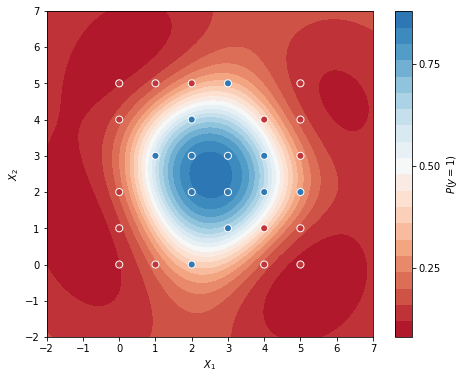

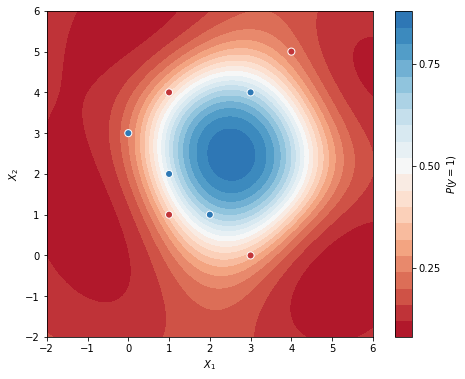

In [8]:
from sklearn.svm import SVC
from pprint import pprint

parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[0.1, 1, 10]}
svc = SVC(probability=True)
clf = GridSearchCV(svc, parameters)

clf.fit(X_train,y_train)

pprint(clf.cv_results_)
pprint(clf.best_params_)

plot_decision_boundary(X_train, y_train, clf)
plot_decision_boundary(X_test, y_test, clf)

In [ ]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
a = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
f = f1_score(y_test, y_pred)
m = matthews_corrcoef(y_test, y_pred)

print(f'Acc {a}\nPre {p}\nRec {r}\nF1  {f}\nMCC {m}')

In [ ]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### AutoML

[WARNING] [2022-01-28 19:06:56,500:Client-AutoML(1):75ff5f74-806d-11ec-8129-0242ac1c0002] Unknown dtype for X: int64, assuming it takes 8 bit/number
("[(0.080000, SimpleClassificationPipeline({'balancing:strategy': 'none', "
 "'classifier:__choice__': 'mlp', 'data_preprocessor:__choice__': "
 "'feature_type', 'feature_preprocessor:__choice__': "
 "'extra_trees_preproc_for_classification', 'classifier:mlp:activation': "
 "'tanh', 'classifier:mlp:alpha': 2.5550223982458062e-06, "
 "'classifier:mlp:batch_size': 'auto', 'classifier:mlp:beta_1': 0.9, "
 "'classifier:mlp:beta_2': 0.999, 'classifier:mlp:early_stopping': 'train', "
 "'classifier:mlp:epsilon': 1e-08, 'classifier:mlp:hidden_layer_depth': 3, "
 "'classifier:mlp:learning_rate_init': 0.00027271287919467994, "
 "'classifier:mlp:n_iter_no_change': 32, 'classifier:mlp:num_nodes_per_layer': "
 "54, 'classifier:mlp:shuffle': 'True', 'classifier:mlp:solver': 'adam', "
 "'classifier:mlp:tol': 0.0001, "
 "'data_preprocessor:feature_type:ca

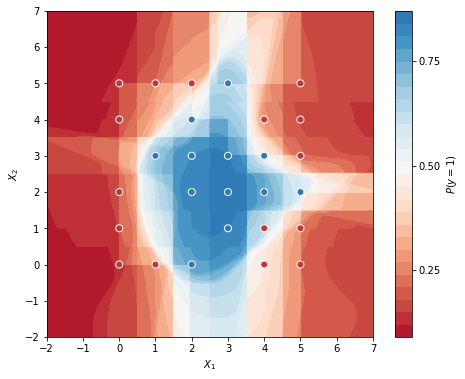

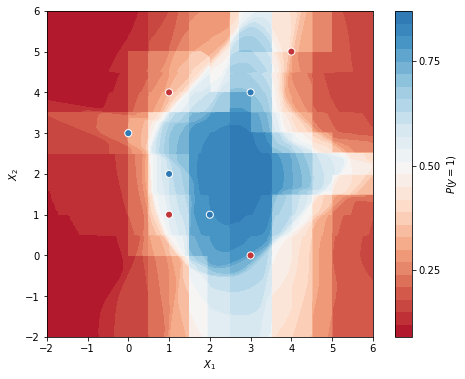

In [10]:
import autosklearn.classification

automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=120,per_run_time_limit=30)
automl.fit(X_train, y_train)
pprint(automl.show_models(), indent=4)

plot_decision_boundary(X_train, y_train, automl)
plot_decision_boundary(X_test, y_test, automl)

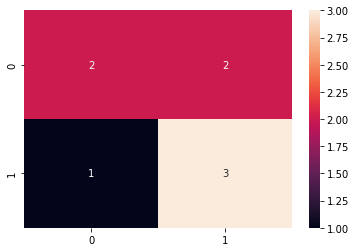

In [11]:
y_pred = automl.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [12]:
a = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
f = f1_score(y_test, y_pred)
m = matthews_corrcoef(y_test, y_pred)

print(f'Acc {a}\nPre {p}\nRec {r}\nF1  {f}\nMCC {m}')

Acc 0.625
Pre 0.6
Rec 0.75
F1  0.6666666666666665
MCC 0.2581988897471611


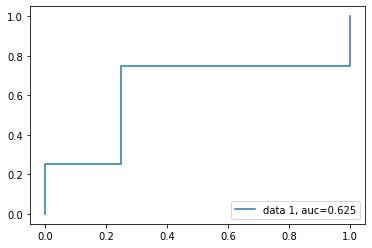

In [13]:
y_pred_proba = automl.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()